## Evaluation and Calibration of the Empirical Models in TELL

This notebook is meant to facilitate exploring the empirical models that underpin `tell`. It will set up the meteorological variables we use and analyze different aspects of the multilayer perceptron model development and evaluation.

### Install the package of data underpinning `tell`

`tell` is based on open-source publicly accessible data. For convienence, we've packaged all of the data underpinning this notebook into a [Zenodo data package](https://zenodo.org/record/6578641#.Yo1R7ZPMJTY). In order to run this notebook, first set the local directory where you would like to store the package data and the run the `install_quickstarter_data` function below. Note that the quickstarter data package will require ~650 MB of storage and can take several minutes to download. You will also need a dataset with sample forcing data for `tell`, also available in a [Zenodo data package](https://zenodo.org/record/6354665#.Yi-_PRDMJTY). The sample forcing data package will require ~250 MB of storage.

In [1]:
# Start by importing the TELL package and information about your operating system:
import os 
import tell


In [2]:
# Identify the current working directory, the "tell_data" directory where the data will is stored, and the image output directory:
current_dir =  os.path.join(os.path.dirname(os.getcwd()))
tell_data_dir = os.path.join(current_dir, r'tell_data')
tell_image_dir = os.path.join(tell_data_dir, r'visualizations', r'mlp_evaluation')

# If the "tell_image_dir" subdirectory doesn't exist then create it:
if not os.path.exists(tell_image_dir):
   os.makedirs(tell_image_dir)


In [3]:
# Download the TELL quickstarter data package from Zenodo:
tell.install_quickstarter_data(data_dir = tell_data_dir)


Done!


In [4]:
# Download the TELL sample forcing data package from Zenodo:
tell.install_sample_forcing_data(data_dir = tell_data_dir)


Done!


### Variable Correlations

The first thing we'll look at is the relationship between the predictive variables in `tell` and the historical electricity demand for different Balancing Authorities (BAs). The function below plots the correlation between the different variables in the historical observed data that underpins `tell`. In general, demand is fairly well correlated with most of the meteorological variables, with the strongest dependency being on 2-m air temperature (T2). The stength of the correlations varies significantly from BA-to-BA. Demand in some BAs is closely tied to variations in weather (e.g., NEVP, ERCO, FPL). In more moderate climates (e.g., SCL, BPAT) the relationships are weaker. This pattern is useful for interpreting the performance of the empircal models in `tell`.

In [6]:
# Plot the correlation between predictive variables in TELL and the historical demand in a given BA. Note that if you set the 'ba_to_plot' variable to "All" the function 
# will compute and plot the average correlation across all BAs:
tell.plot_ba_variable_correlations(ba_to_plot = 'All', 
                                   data_input_dir = tell_data_dir,
                                   image_output_dir = tell_image_dir,
                                   image_resolution = 150,
                                   save_images = True)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 2500x1000 with 0 Axes>

### Empirical Model Training

Next we'll train the `tell` models using the standard settings found in the `mlp_settings.yml` file. By default, the `tell` multi-layer perceptron (MLP) models are trained on historical weather and load data from 2016-2018 and evaluated using data from 2019.

In [7]:
# Train the empirical models using the standard settings:
prediction_df, validation_df = tell.train_batch(target_region_list = (tell.get_balancing_authority_to_model_dict().keys()),
                                                data_dir = os.path.join(tell_data_dir, r'tell_quickstarter_data', r'outputs', r'compiled_historical_data'),
                                                n_jobs = -1)
        
# View the validation dataframe that contains error statistics for the trained models:
validation_df


,BA,RMS_ABS,RMS_NORM,MAPE,R2
0,AEC,43.182333,0.080527,0.060206,0.895177
0,AECI,349.811003,0.130529,0.133922,0.652215
0,AVA,162.161834,0.110138,0.108262,0.681471
0,AZPS,226.108856,0.066803,0.052413,0.948951
0,BANC,119.132254,0.062582,0.045901,0.918882
0,BPAT,289.193302,0.045355,0.034236,0.902667
0,CHPD,28.805568,0.136962,0.084884,0.758776
0,CISO,2144.139480,0.087673,0.064678,0.775649
0,CPLE,511.961396,0.072310,0.055798,0.894201
0,DOPD,29.164507,0.141334,0.142977,0.475714


### Empirical Model Evaluation

After training the models, we'll visualize their performance by plotting the error characteristics for each of the BAs in `tell`. In general, the default training settings results in models that perform quite well. 76% (41/54) of the BAs have an R2 value greater than 0.75 while 83% (45/54) have a MAPE under 10%. The following statistical values, all computed using the sklearn package, are used to evaluate the MLP models:

| Parameter | Description | Documentation |
| :-: | :- | :-: |
| R2 | Coefficient of determination | [sklearn.metrics.r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) |
| RMS_ABS | Root-mean-squared of the absolute error | [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) |
| RMS_NORM| The RMS_ABS value divided by the mean | [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) |
| MAPE| Mean absolute percentage error | [sklearn.metrics.mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error) |

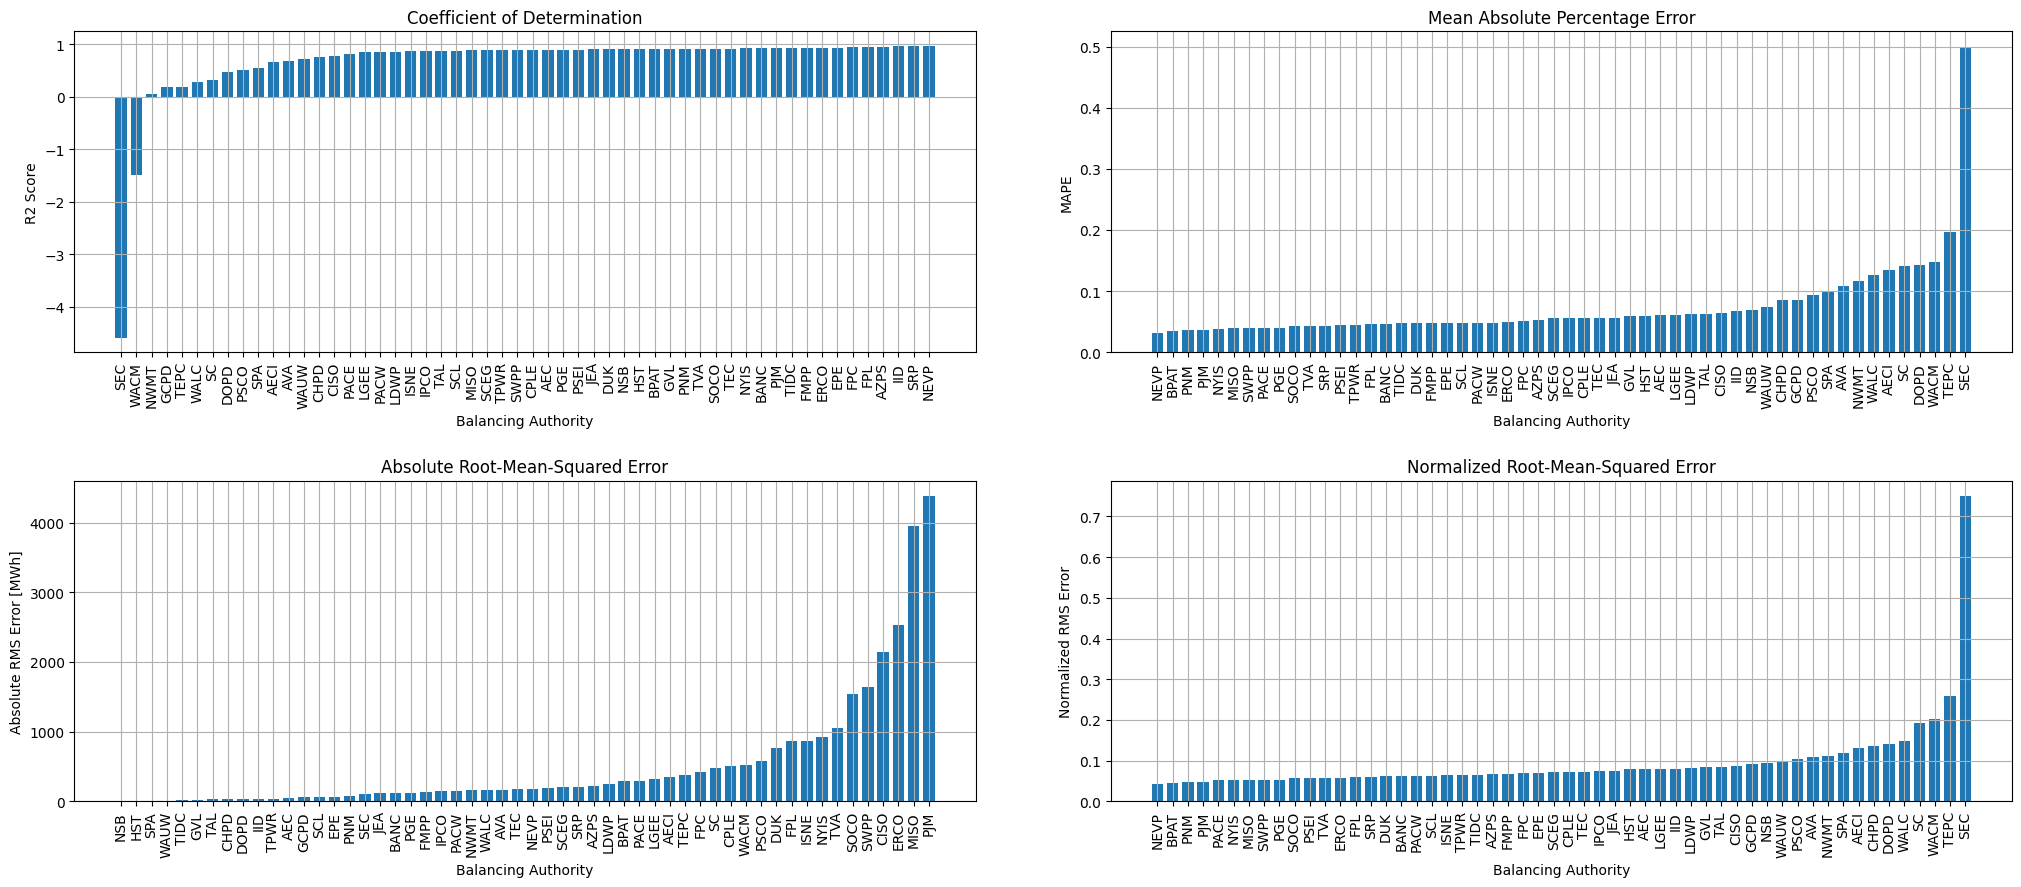

In [8]:
# Plot the statistical performance (e.g., RMS_ABS, RMS_NORM, MAPE, or R2) of the predictive models across all the BAs in TELL:
tell.plot_mlp_summary_statistics(validation_df, 
                                 image_output_dir = tell_image_dir,
                                 image_resolution = 150,
                                 save_images = True)


It's illustrative to look at the error metrics as a function of load. To do this, we calculate the mean hourly load for each BA during the evaluation year and then plot the error statistics as a function of that mean load. Analyzing the data in this way demonstrates that the BAs with the poorly performing emprical models are almost universally the smaller BAs. The largest BAs, which are critically important for the overall demand on the grid, generally perform quite well. Of the 10 BAs with the largest mean demand, 9/10 have a MAPE value under 5% and an R2 value greater than 0.85. Conversely, of the 10 worst performing BAs (judged by their MAPE value), 7/10 have an average hourly load less than 1700 MWh.

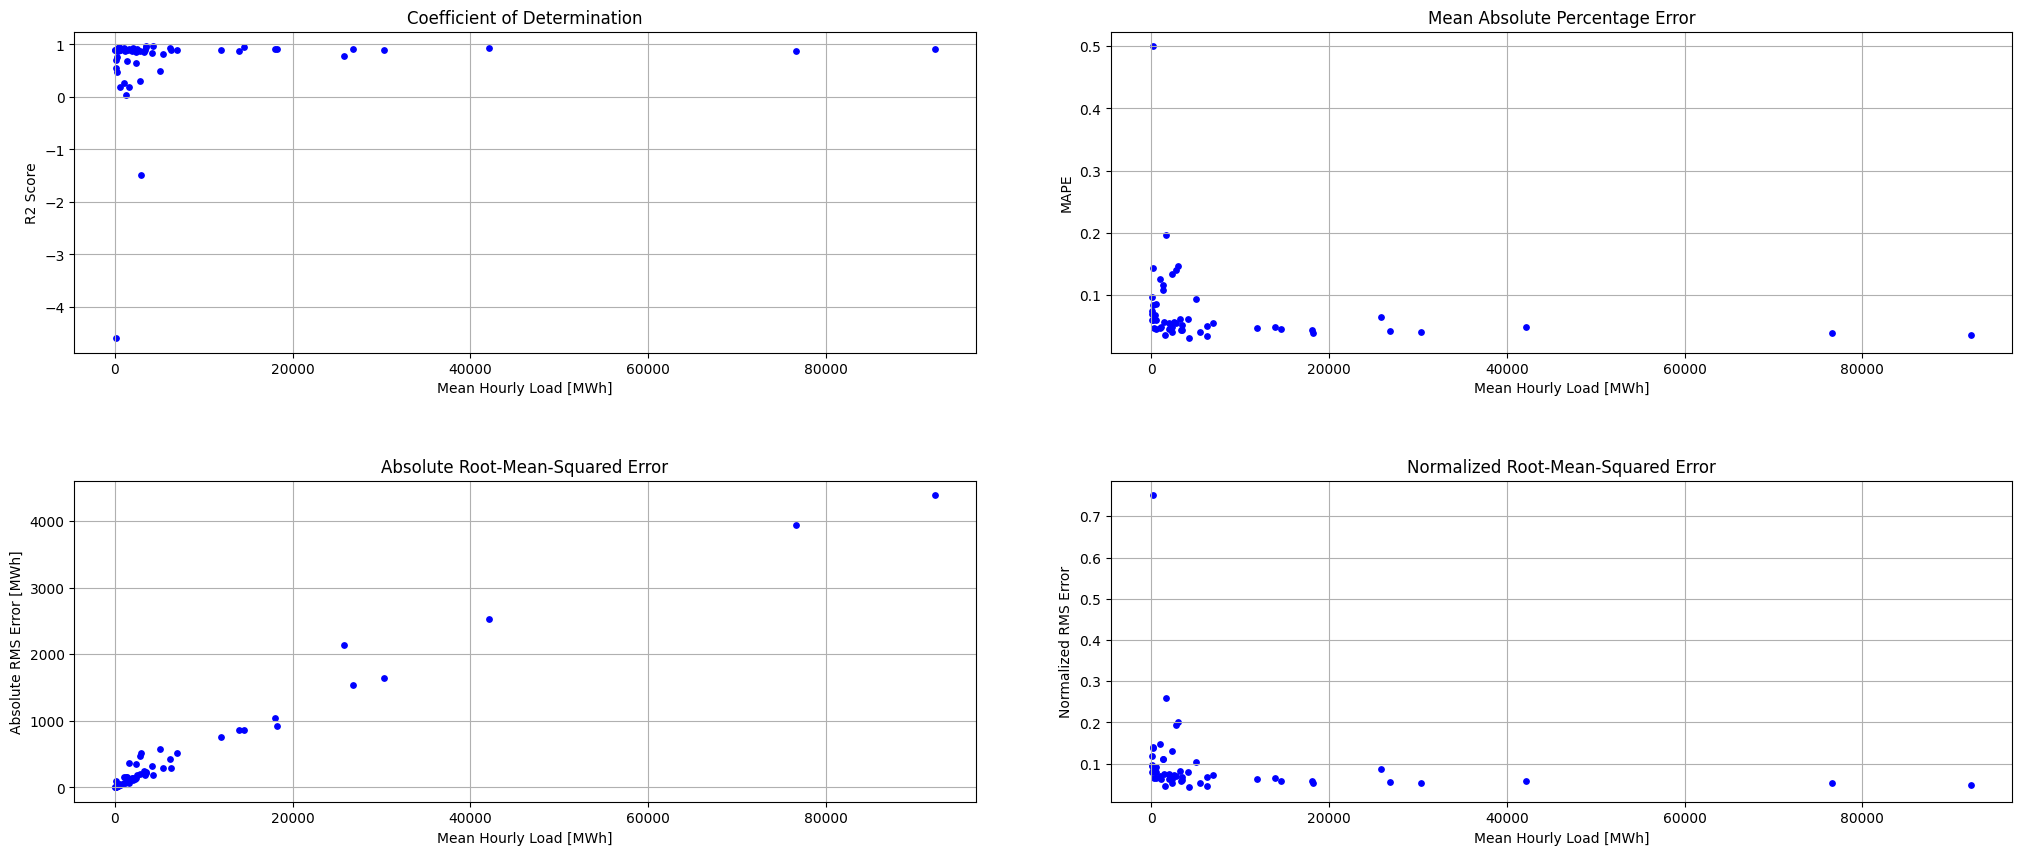

In [9]:
# Plot the statistical performance (e.g., RMS_ABS, RMS_NORM, MAPE, or R2) of the predictive models as a function of mean load for each BA and update the validation dataframe:
validation_df = tell.plot_mlp_errors_vs_load(prediction_df, 
                                             validation_df, 
                                             image_output_dir = tell_image_dir,
                                             image_resolution = 150,
                                             save_images = True)


In [10]:
# Show the performance metrics for the 10 largest BAs:
validation_df.sort_values(by='Mean_Load_MWh', ascending=False).head(10)


,BA,RMS_ABS,RMS_NORM,MAPE,R2,Mean_Load_MWh
33,PJM,4384.157491,0.047989,0.036301,0.923456,92210.662207
25,MISO,3947.497097,0.053240,0.039292,0.878299,76619.835008
12,ERCO,2530.005379,0.057767,0.049336,0.927076,42119.527111
44,SWPP,1645.852724,0.053497,0.039910,0.887349,30293.849803
41,SOCO,1533.652153,0.056336,0.042837,0.914973,26834.796915
7,CISO,2144.139480,0.087673,0.064678,0.775649,25799.798821
29,NYIS,929.351301,0.052242,0.038412,0.916865,18227.237103
50,TVA,1047.724282,0.057605,0.043287,0.910637,18059.878150
15,FPL,862.808712,0.058933,0.045441,0.943773,14572.596672
21,ISNE,864.147603,0.063998,0.048545,0.867955,13923.671245


In [11]:
# Show the performance metrics for the 10 poorest performing BAs (judged by MAPE):
validation_df.sort_values(by='MAPE', ascending=False).head(10)


,BA,RMS_ABS,RMS_NORM,MAPE,R2,Mean_Load_MWh
40,SEC,101.168513,0.750749,0.499948,-4.591980,165.958447
47,TEPC,371.806851,0.258675,0.196325,0.191082,1607.111915
51,WACM,520.094134,0.201556,0.147421,-1.484909,2989.590970
9,DOPD,29.164507,0.141334,0.142977,0.475714,182.106626
37,SC,474.745860,0.193536,0.140727,0.307988,2789.405638
1,AECI,349.811003,0.130529,0.133922,0.652215,2388.952379
52,WALC,160.437651,0.147696,0.126292,0.274431,1036.259788
28,NWMT,159.519694,0.110718,0.116043,0.046473,1296.417578
2,AVA,162.161834,0.110138,0.108262,0.681471,1363.815205
42,SPA,8.902786,0.119174,0.097712,0.547590,74.216259


### Performance of Individual BAs

The next set of plots analyzes the predicted and observed demands for individual BAs in order to shed more light on the performance of the `tell` empirical models. The first function plots the time-series and histograms of observed and predicted demands for a given BA. Using this function you can see the strong performance of `tell` in larger BAs (e.g., PJM, MISO, ERCO). They also shed some clues into the poor performance in smaller BAs. For example, the data from SEC shows bad observations that weren't caught by the data cleanining functions that are ran before the MLP models are trained. Despite its poor performance, the small loads present in SEC allow us to retain the model for that BA even though it is poor without impacting the overall fidelity of `tell`.

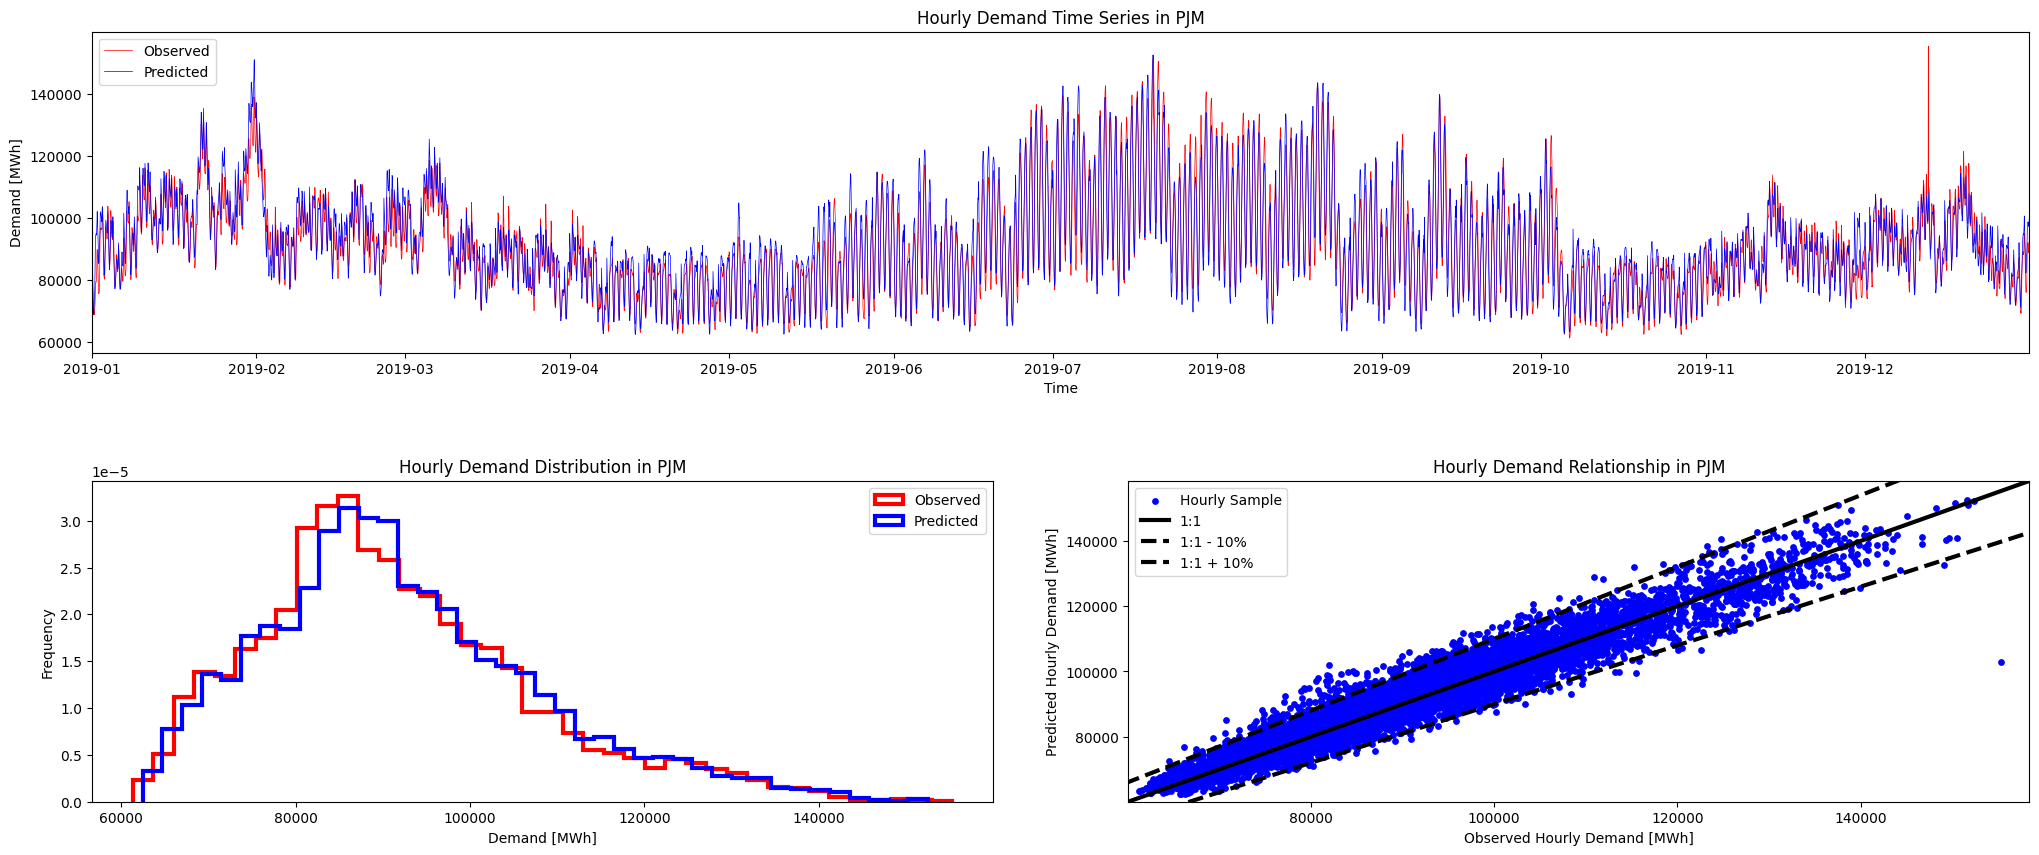

In [12]:
# Plot the performance characteristics of a single BA:
tell.plot_mlp_ba_time_series(prediction_df, 
                             ba_to_plot = 'PJM',
                             image_output_dir = tell_image_dir,
                             image_resolution = 150,
                             save_images = True)


Next let's take a look at the performance of the `tell` empirical models during the peak week of demand during the evaluation period. To find the peak demand week we compute a weekly rolling mean value of predicted demand using exponentially-weighted windows and then subset the data to +/- 3.5 days around the peak value. This analysis can be used to understand how well `tell` is capturing peak loads.

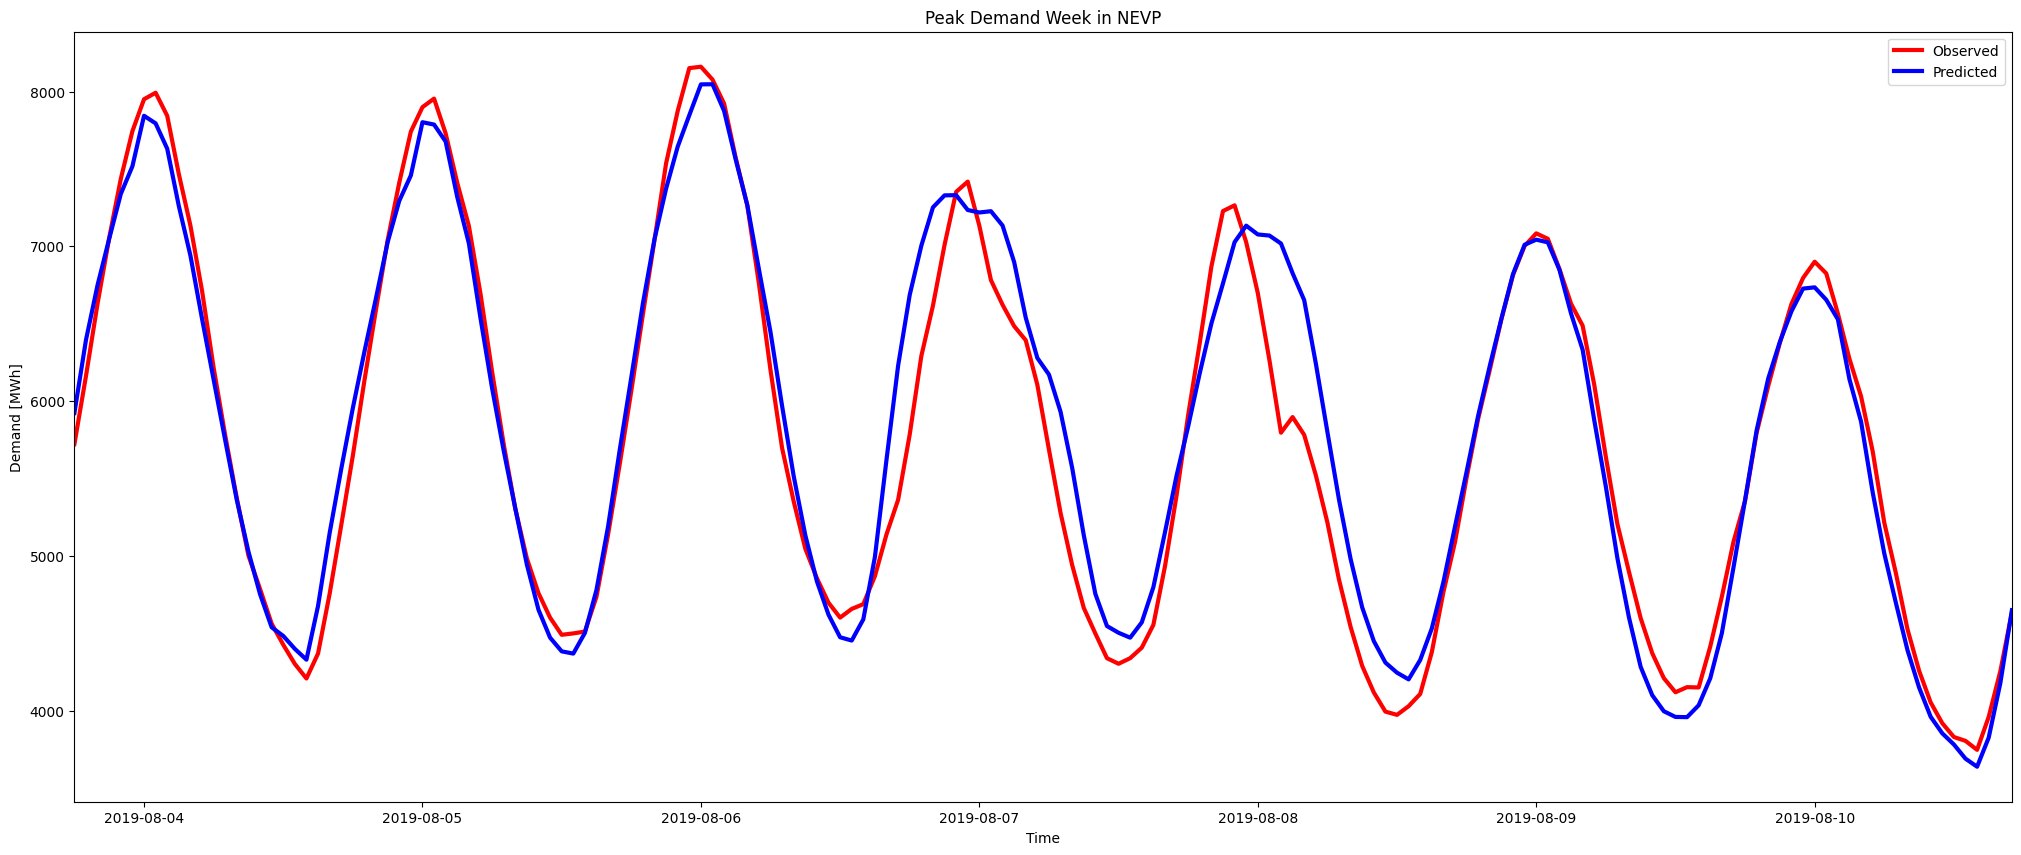

In [13]:
# Plot the performance of the models for a given BA during it's peak demand week during the evaluation year (2019):
tell.plot_mlp_ba_peak_week(prediction_df, 
                           ba_to_plot = 'NEVP',
                           image_output_dir = tell_image_dir,
                           image_resolution = 150,
                           save_images = True)
